<div class="alert alert-block alert-info">

Accepted. See comments.

In [84]:
#Import packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from linearmodels import IV2SLS
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [109]:
#Load data for exercise 1
df1_s = pd.read_csv('suplearnsmall1.csv')
df2_s = pd.read_csv('suplearnsmall2.csv')
df3_l = pd.read_csv('suplearnbig1.csv')
df4_l = pd.read_csv('suplearnbig2.csv')
df5_l = pd.read_csv('suplearnbig3.csv')
target_df = pd.read_csv('targetmissing.csv')


# Supervised learning using simple linear regression

*a) Randomly select 20 pct. of the observations*

In [86]:
# splitting data into x and y
y = df1_s['y']
x = df1_s['x']

In [87]:
#split data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,test_size=0.2, random_state = 42)

*b) Run a simple linear regression of y on x using OLS on your training data.*

In [88]:
#add constant to training data
x_train = sm.add_constant(x_train)

ols1 = sm.OLS(y_train, x_train).fit()

*c) predict value of y for all observations in your data based on your estimated model from b. compute the squared difference between the actual value of y and the predicted y.*

In [89]:
#add constant to test data
x_test = sm.add_constant(x_test)

#predict y using model from b (ols1)
yhat_train = ols1.predict(x_train)
yhat_test = ols1.predict(x_test)

In [90]:
#compute squared difference
sq_diff_test = (y_test - yhat_test)**2

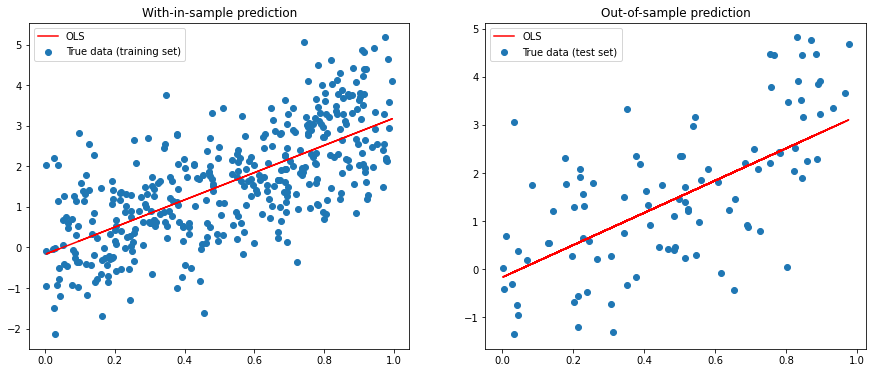

In [91]:
#Vizualising the results
fig, ax = plt.subplots(1,2, figsize = (15,6))

ax[0].scatter(x_train['x'],y_train, label = "True data (training set)")
ax[0].plot(x_train['x'],yhat_train, c='r', label = "OLS")
ax[0].set_title("With-in-sample prediction")
ax[0].legend()

ax[1].scatter(x_test['x'],y_test , label = "True data (test set)")
ax[1].plot(x_test['x'],yhat_test, c='r', label = 'OLS')
ax[1].set_title("Out-of-sample prediction")
ax[1].legend()

*d) Compute MSE*


In [92]:
# compute mean squared error
MSE_test = sq_diff_test.mean()
print('MSE:', MSE_test)

MSE: 1.2942794608607544


*e) For each observation in targetmissing.csv use the supervised learning model from above to compute a prediction for y*

In [93]:
#add constant for the regression
new_x = sm.add_constant(target_df['x'])

#using ols1 model to predict y
y_hat_target = ols1.predict(new_x)

*f) Use the computed value for y to examine whether individuals with d equal to 1 (high income individuals) have a higher or lower value of y on average.*

In [94]:
#add prediction to df
target_df['y_hat'] = y_hat_target

#check mean of y_hat of dummy groups
d_1 = target_df[target_df['d'] == 1].mean()
d_0 = target_df[target_df['d'] == 0].mean()

print('mean of above 50.000 euro, dummy set to 1:', d_1['y_hat'])
print('mean of below 50.000 euro, dummy set to 0:', d_0['y_hat'])

mean of above 50.000 euro, dummy set to 1: 1.8968496278635587
mean of below 50.000 euro, dummy set to 0: 1.181192060385896


*g) repeat steps a-d on different datasets*

In [95]:
#function to run regression, return MSE
def supervised_ols(df):
    
    #split data
    y = df['y']
    x = df['x']
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,test_size=0.2, random_state = 42)
     
    #add constant to training data
    x_train = sm.add_constant(x_train)
    
    #run regression on training
    ols1 = sm.OLS(y_train, x_train).fit()

    #add constant to test data
    x_test = sm.add_constant(x_test)
    
    #predict y using ols model
    yhat_train = ols1.predict(x_train)
    yhat_test = ols1.predict(x_test)
    
    #compute squared difference
    sq_diff_test = (y_test - yhat_test)**2
    
    #compute MSE
    MSE_test = sq_diff_test.mean()
    
    return('MSE:', MSE_test)


In [96]:
#throw all data sets into function, print MSE
print(supervised_ols(df2_s))
print(supervised_ols(df3_l))
print(supervised_ols(df4_l))
print(supervised_ols(df5_l))



('MSE:', 1.3574676930936065)
('MSE:', 1.030710618395753)
('MSE:', 1.4088653943551348)
('MSE:', 1.3199328091393694)


# Supervised machine learning using polynominal regression

*a) Open suplearnsmall1.csv and create new variables corresponding to x2, x3, x4, x5 and x6*

In [97]:
new_df1 = df1_s

#loop and create higher level x variables
for i in range(2,7):
    new_df1['x' + str(i)] = (new_df1.x ** i)

<div class="alert alert-block alert-info">
Small seperate note: I'm guessing that you are doing this "new_df1 = df1_s" to avoid changing anything in the original "df1_s" df, but with Python you would have to add .copy to achieve this: "new_df1 = df1_s.copy()". Else the new variables will still be added to the original df.

*b) Randomly select 20 pct. of the observation and designate these as the test data set.*

In [98]:
#use all variables besides Y
x = new_df1.iloc[:, 1:]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x, new_df1['y'], train_size=0.8,test_size=0.2, random_state = 42)

*c) Run the polynomial regression by regressing y on x and all the variable you created under a, using only training data*

In [99]:
#adding constant to training data
x_train = sm.add_constant(x_train)

#create second ols model, robust standard errors
ols2 = sm.OLS(y_train, x_train).fit(cov_type = 'HC0')


*d) Compute the predicted value of y for all observations in your data based on your estimated model from c). For each observation also compute the squared difference between the actual value of y and the predicted y*

In [100]:
#add constant to test data
x_test = sm.add_constant(x_test)

#predict both training and test dataset
y_hat_train = ols2.predict(x_train)
y_hat_test = ols2.predict(x_test)

 #compute squared difference
sq_diff_test = (y_test - y_hat_test)**2


*e) Mean squared error, only test data*


In [101]:
#compute MSE
MSE_test = sq_diff_test.mean()
MSE_test

1.227263340741276

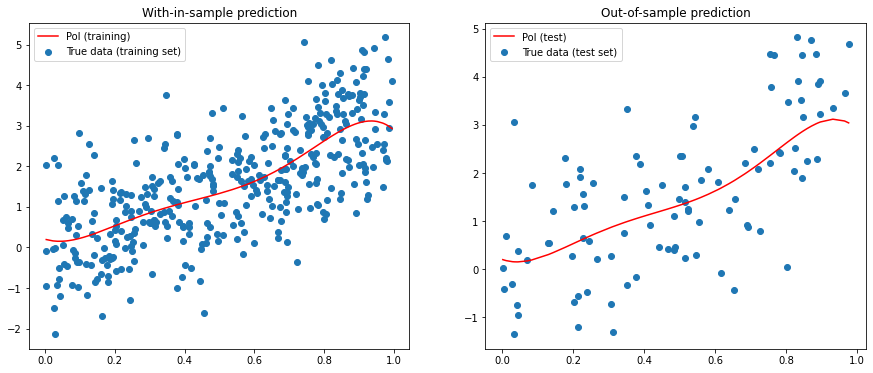

In [82]:
#visualise the model

#sort data by x
x_train['y'] =y_train
x_train['yhat'] =y_hat_train
x_train = x_train.sort_values(by='x', ascending = False)

x_test['y'] =y_test
x_test['yhat'] =y_hat_test
x_test = x_test.sort_values(by='x', ascending = False)

fig, ax = plt.subplots(1,2, figsize = (15,6))

ax[0].scatter(x_train.x,x_train.y, label = "True data (training set)")
ax[0].plot(x_train.x, x_train.yhat, c='r', label = "Pol (training)")
ax[0].set_title("With-in-sample prediction")
ax[0].legend()

ax[1].scatter(x_test.x,x_test.y , label = "True data (test set)")
ax[1].plot(x_test.x,x_test.yhat, c='r', label = 'Pol (test)')
ax[1].set_title("Out-of-sample prediction")
ax[1].legend();

*f) Repeat steps a)-d) for each of the data sets suplearnsmall2.csv, su- plearnbig1.csv, suplearnbig2.csv and suplearnbig3.csv*

In [103]:
#function for polynominal prediction
def supervised_polynominal(df):
    #loop and create higher level x variables
    for i in range(2,7):
        df['x' + str(i)] = (df.x ** i)
    
    #use all variables besides Y
    x = df.iloc[:, 1:]

    #splitting data
    x_train, x_test, y_train, y_test = train_test_split(x, df['y'], train_size=0.8,test_size=0.2, random_state = 42)
    
    #adding constant to training data
    x_train = sm.add_constant(x_train)

    #create second ols model, robust standard errors
    ols2 = sm.OLS(y_train, x_train).fit(cov_type = 'HC0')
    
    #add constant to test data
    x_test = sm.add_constant(x_test)

    #predict both training and test dataset
    y_hat_train = ols2.predict(x_train)
    y_hat_test = ols2.predict(x_test)

    #compute squared difference
    sq_diff_test = (y_test - y_hat_test)**2
    
    #compute and return MSE
    MSE_test = sq_diff_test.mean()
    
    return('MSE:', MSE_test)

In [107]:
#load datasets again
df1_s = pd.read_csv('suplearnsmall1.csv')
df2_s = pd.read_csv('suplearnsmall2.csv')
df3_l = pd.read_csv('suplearnbig1.csv')
df4_l = pd.read_csv('suplearnbig2.csv')
df5_l = pd.read_csv('suplearnbig3.csv')

In [108]:
#run polynominal regressions on all sets
print(supervised_polynominal(df1_s))
print(supervised_polynominal(df2_s))
print(supervised_polynominal(df3_l))
print(supervised_polynominal(df4_l))
print(supervised_polynominal(df5_l))


('MSE:', 1.227263340741276)
('MSE:', 0.8945702658856058)
('MSE:', 1.0229881853640972)
('MSE:', 1.0087132998704178)
('MSE:', 1.1986684809937451)


*MSE from linear model*

(MSE: 1.2942794608607544)

('MSE:', 1.3574676930936065)

('MSE:', 1.030710618395753)

('MSE:', 1.4088653943551348)

('MSE:', 1.3199328091393694)

Comparing the mean squared errors, we see that the polynominal regression performs better on all datasets, but that the difference in performance is especially big in df2. This is because the linear model tried to force a straight line on a dataset that was kind of wonky, meaning that the more flexible polynominal approach was better at approximating the data. This dataset was also very small, meaning that the B0 and B1 will be calculated using few observations, which again will increase our standard error (and as an extension) our MSE. 
